<h1>Ontologies and Linked biomedical data: A tutorial</h1>

<p>This session will be a guided hands-on tour that will show you how ontologies and APIs can be used to link and analyze biomedical data.
We will make heavy use of data and resources of the <a href="https://monarchinitiative.org/" __target="__blank">Monarch
Initiative</a> including the <a href="https://hpo.jax.org/app/">Human Phenotype Ontology</a>. We will use this Python 
notebook and indicate places where workshop participants can modify the notebook to ask their own questions. We
will not attempt to teach you Python, but we will explain what you need to know for this workship on an ad hoc basis.</p>

<h3>Using this notebook at home</h3>
<p>One of the hardest things about Python is the fact there are so many versions and environments that are not mutually compatible.
We have set up everything today so that hopefully it will just work, but you will very probably need to do some
additional work to get this notebook to run on your own laptop. We recommend using the 
<a href="https://anaconda.org/anaconda/python" target="__blank">Anaconda</a> package and version 3.6 or higher of Python.
Assuming you have installed Python, you will need to install the libraries needed by the notebook to work. <p>
<p>For instance, to install requests, you would start anaconda and install it as follows (assuming you had previously created a Python 3 environment with a command <tt>conda create --name pyth3 python=3</tt>.
    <pre>
    $ source activate pyth3
    $ conda install requests
    </pre>
    </p>
<p>
    This will not work for packages that are not represented in the Anacoda distribution. One important package
    for the following is 
    <a href="https://ontobio.readthedocs.io/en/latest/" target="__blank">ontobio</a>. To install this package, 
    simply use pip3.
    <pre>
    $ pip3 install ontobio
    </pre>
    You will need to install the following packages unless they happen to have been previously installed.
    <table>
    <tr><td>ontobio</td></tr>
    <tr><td>pymongo</td></tr>
    <tr><td>plotly</td></tr>
    <tr><td>requests</td></tr>
     <tr><td>json</td></tr>
      <tr><td>networkx</td></tr>
    </table>
    Following this, restart the notebook (if necessary).
    </p>
    

<h3>Python scripts and libraries</h3>
<p>Python is a popular scripting language that offers an extensive collection of libraries and resources for machine learning and
interacting with biomedical ontologies. This file is a Jupyter notebook, which is a web application that allows you to create and share 
documents that contain live Python code, equations, visualizations and narrative text. Python scripts usually
begin by importing libraries that perform specific functions. For instance, the following <tt>import pprint</tt> command
imports functions from the <a href="https://docs.python.org/3/library/pprint.html" target="__blank">Pretty Print</a>
library that print certain kinds of text with indentations.</p>

In [1]:
import requests
import json
from pprint import pprint
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=UserWarning)
    import matplotlib,networkx

<h1>APIs</h1>
API stands for <em>Application Programming Interface</em>. API can have many meanings in computer science,
but for today we are interested in Web APIs, i.e., internet servers that
 receive requests and send responses. Many Web APIs send responses formated as <a href="https://en.wikipedia.org/wiki/JSON" target="__blank">JSON</a>
    (JavaScript Object Notation). JSON is not the same as JavaScript (a programming language intended for Web browsers). The following shows an
    example of how to retrieve data about 
    <a href="https://www.genenames.org/cgi-bin/gene_symbol_report?hgnc_id=HGNC:1097" target="__blank">BRAF1</a> from the Human Gene Nomenclature Committee (HGNC) API.</p>
  <p>We will not delve into JSON format here (although questions are welcome). Suffice it to say that JSON provides
   a hierarchical structure for lists and dictionaries of key-value pairs that make it straightforward to organize and transmit relatively complex data structures. For those who want to learn more about converting Python objects to JSON strings and vice versa, this <a href="http://zetcode.com/python/simplejson/" target="__blank">simple tutorial</a> is recommended.</p>
    
    
    

In [2]:
uri = 'http://rest.genenames.org/fetch/hgnc_id/1097'
headers = { 'Accept': 'application/json' }
r = requests.get(uri,headers=headers)
mydict=json.loads(r.text)
pprint (mydict['response'])

{'docs': [{'_version_': 1607571161067028481,
           'alias_symbol': ['BRAF1'],
           'ccds_id': ['CCDS5863', 'CCDS87555'],
           'cosmic': 'BRAF',
           'date_approved_reserved': '1991-07-16T00:00:00Z',
           'date_modified': '2018-07-31T00:00:00Z',
           'date_name_changed': '2014-06-26T00:00:00Z',
           'ena': ['M95712'],
           'ensembl_gene_id': 'ENSG00000157764',
           'entrez_id': '673',
           'gene_family': ['Mitogen-activated protein kinase kinase kinases',
                           'RAF family'],
           'gene_family_id': [654, 1157],
           'hgnc_id': 'HGNC:1097',
           'iuphar': 'objectId:1943',
           'location': '7q34',
           'location_sortable': '07q34',
           'locus_group': 'protein-coding gene',
           'locus_type': 'gene with protein product',
           'lsdb': ['LRG_299|http://ftp.ebi.ac.uk/pub/databases/lrgex/LRG_299.xml'],
           'mgd_id': ['MGI:88190'],
           'name': 'B-Raf pro

<h1>Using Biolink to query for Mendelian diseases associated with Nephroblastoma</h1>
<p>At this point in the workshop, we will turn to a presentation about the 
    <a href="https://hpo.jax.org/app/" target="__blank">Human Phenotype Ontology (HPO)</a> before proceeding.
We will use the HPO to explore clinical data surrounding selected cancer predisposition syndromes.</p>
<p>...</p>
<h2>Using Monarch APIs to access clinical and translational data</h2>
<p>We will use the <a href="https://github.com/biolink/ontobio" target="__blank">ontobio API</a> to access
    HPO data in this notebook. It is not important for you to understand all of the steps to use the notebook, 
    but please run each of the cells as we go along (this will be explained in the workshop).</p>

In [3]:
import ontobio
from ontobio import OntologyFactory

/home/robinp/bin/anaconda3/lib/python3.6/site-packages/cachier/mongo_core.py:24: UserWarning: Cachier warning: pymongo was not found. MongoDB cores will not work.
  "Cachier warning: pymongo was not found. MongoDB cores will not work.")
/home/robinp/bin/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


<h2>Getting the HPO data via API and initializing the ontology software objects</h2>
<p>The following code gets the HPO from the OntoBee SPARQL server
(which may take 10 sec the first time you run the code;afterwards it is cached). For the purposes
    of this workshop, we will concentrate on a simplified version of the HPO that uses only subclass relations between the terms

In [4]:
# Get the HPO using default method (currently OntoBee SPARQL)
## This may take 5-10s the first time you run it; afterwards it is cached
ofa = OntologyFactory()
ont = ofa.create('hp')
ont = ont.subontology(relations='subClassOf')
## Get the root of the abnormality subset
[root] = ont.search('Phenotypic abnormality')
root

'HP:0000118'

<h2>Retrieving a term with the ontobio API</h2>
<p>We can now retrieve terms by passing their label to the API. For instance, the following command retrieves the term ID for <a href="https://hpo.jax.org/app/browse/term/HP:0001166" target="__blank">Arachnodactyly</a>.


In [5]:
## Arbitrary term
[t] = ont.search('Arachnodactyly')
print (t)

HP:0001166


<h2><font color="red">Exercise</font></h2>
<p>Adapt the command above to search for the term ID for the HPO term for 
<a href="https://hpo.jax.org/app/browse/term/HP:0000347" target="__blank">Micrognathia</a>. To do this, click on the 
grey box, alter the text, and click on the 'Run' button at the top of the page.</p>

<h2>Showing paths in the HPO</h2>
<p>Ontologies contain a list of concepts (similar to terminologies), but also specify the relations between individual concepts.
The HPO has subclass relations. For instance, 
<a href="https://hpo.jax.org/app/browse/term/HP:0005280" target="__blank">Depressed nasal bridge</a> is a subclass of
<a href="https://hpo.jax.org/app/browse/term/HP:0000422" target="__blank">Abnormality of the nasal bridge</a>.
We can display the concepts and relations and nodes and edges in a graph.</p>

In [6]:
from networkx import nx
import matplotlib.pyplot as plt
G = ont.get_graph()
[root] = ont.search('Phenotypic abnormality')  ## Root of ontology
[t1] = ont.search('Depressed nasal bridge')
ancs1 = ont.ancestors(t1, reflexive=True)  ## Get ancestors of Depressed nasal bridge
ancs1 = [a for a in ancs1 if a.startswith('HP:')]
[t2] = ont.search('Prominent nasal bridge')
ancs2 = ont.ancestors(t2, reflexive=True)  ## Get ancestors of Prominent nasal bridge
ancs2 = [a for a in ancs2 if a.startswith('HP:')]
ancs=list(set(ancs1)|set(ancs2)) # combine the two lists
ancs

['HP:0000366',
 'HP:0000271',
 'HP:0005280',
 'HP:0000234',
 'HP:0000118',
 'HP:0000001',
 'HP:0000422',
 'HP:0000152',
 'HP:0000426']

/home/robinp/bin/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/robinp/bin/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/robinp/bin/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


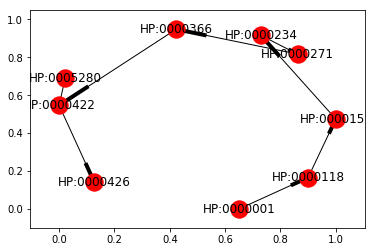

In [7]:
## Make a sub-ontology with just term and ancestors

subont = ont.subontology(ancs)
nx.draw_networkx(subont.get_graph())
plt.show()

<h2>Show all Mendelian diseases characterized by Nephroblastoma</h2>
<p>The HPO project includes not only the ontology but also a rich set of disease annotations for a total of about 7000
rare diseases. We can use the API to retrieve a list of diseases associated with any of the HPO terms.</p>

In [8]:
from ontobio.assoc_factory import AssociationSetFactory
afactory = AssociationSetFactory()

In [9]:
HUMAN='NCBITaxon:9606'
aset=afactory.create(ontology=ont, subject_category='disease',object_category='phenotype',taxon=HUMAN)

In [10]:
[t]=ont.search('Nephroblastoma')
diseases=aset.query([t])
print('Number of diseases associated with Nephroblastoma:',len(diseases))

Number of diseases associated with Nephroblastoma: 110


In [11]:
dlabels = ["{} ".format(aset.label(d)) for d in diseases]
dlabels[1:10]

['renal cell carcinoma (disease) ',
 'pleomorphic lipoma ',
 'spindle cell sarcoma ',
 'leukemia (disease) ',
 'liver cancer ',
 'schwannoma ',
 'hepatocellular carcinoma ',
 'mediastinal cancer ',
 'lymphoma ']

<h2>Disease similarity matrix</h2>
<p>The following code creates a heatplot that shows the disease-disease similarity matrix using
a semantic similarity algorithm (simple version of the algorithm explained 
 <a href="https://www.ncbi.nlm.nih.gov/pubmed/19800049" target="__blank">here</a>).

/home/robinp/bin/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


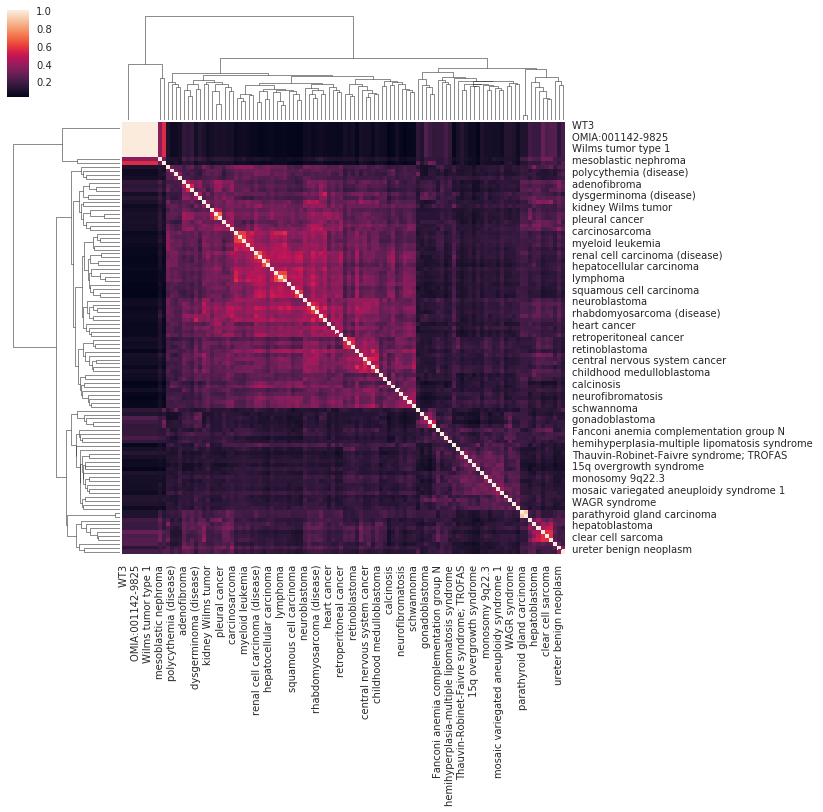

In [12]:
z, xlabels, ylabels = aset.similarity_matrix(diseases, diseases)
import seaborn as sns
import numpy as np 
import pandas as pd


sns.set(color_codes=True)
zarray = np.array(z)
zarray_df = pd.DataFrame(zarray, columns=dlabels, index=dlabels)

cm = sns.clustermap(zarray_df, method="average",metric="Euclid")

<h2><font color="red">Exercise</font></h2>
<p>We will now demonstrate how to use the Exomiser to perform phenotype-driven genomic diagnostics (see 
<a href="https://www.ncbi.nlm.nih.gov/pubmed/26229552" target="__blank">Phenotype-driven strategies for 
exome prioritization of human Mendelian disease genes</a> for background information).</p>
<p>We will use an Web-based demo version of the Exomiser (of course, do not enter PMI data here!). <p>
<p>Please navigate to the <a href="http://monarch-exomiser-web-dev.monarchinitiative.org/exomiser/"
target="__blank">Exomiser Website</a>.</p>
<p>Imagine we are trying to find the disease diagnosis in a 10 year old boy presenting with hemiparesis and with the following additional findings after workup:
<ul>
    <li>Non-Hodgkin lymphoma</li>
    <li>Cafe-au-lait spot</li>
    <li>Primitive neuroectodermal tumor</li>
</ul>
  Whole exome sequencing is performed. In order to use the Exomiser to help interpret the findings, upload the VCF file (that will be provided; it contains a public VCF file from the 1,000 Genomes project with one additional variant that was taken from a publication -- thus, this file contains no PMI). We will explain in class how to setup the Exomiser analysis and interpret the results. It may be useful to search for both recessive and dominant conditions and to consider which model best explains the clinical findings</p>
 <p>This case was adapted from the publised case available here: 
    <a href="https://www.ncbi.nlm.nih.gov/pubmed/15077197" target="__blank">PMID:15077197</a>. Please consult this
    only after trying to find the answer with the Exomiser.</p>
   

<h1>SPARQL</h1>
<p>The final topic of this workshop will be SPARQL. SPARQL is a query language for the Semantic Web.
It is roughly similar to SQL, a query laguage for relational databases, but it is designed to work
with the linked data of the semantic web. We will demonstrate some of the features of SPARQL using
a SPARQL endpoint that contains a vesion of the National Cancer Institutes Thesaurus (NCIT). You
can do simple searches on the NCIT at the <a href="https://ncit.nci.nih.gov/ncitbrowser/" target="__blank">NCIT
Website</a>. The version of the NCIT we will use today was generated by the Monarch Initiative; see
the <a href="https://github.com/NCI-Thesaurus/thesaurus-obo-edition" target="__blank">GitHub page</a> for
more information</p>
<p>We will use the Pandas and SPARQLWrapper Python packages to retrieve results from the Monarch SPARQL endpoint
for the NCIT data. We will explain some of the syntax of SPARQL using examples from the NCIT. Please
explore these examples and substitute concepts in the queries. If desired, you can use the NCIT Website to
search for terms for the SPARQL queries. The following query retrieves diseases and labels (<tt> ?disease ?label </tt>)
    for diseases that have as their anatomic site the bone marrow. Note that <tt>?disease</tt> returns the database id, and  <tt>?label</tt> returns the name of the disease.</p>

In [13]:
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd

In [14]:
sparql = SPARQLWrapper("https://stars-app.renci.org/ncitgraph/sparql")

sparql.setQuery("""
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX Disease_Has_Associated_Anatomic_Site: <http://purl.obolibrary.org/obo/NCIT_R100>
    PREFIX Bone_Marrow: <http://purl.obolibrary.org/obo/NCIT_C12431>
    SELECT DISTINCT ?disease ?label 
    FROM <http://purl.obolibrary.org/obo/ncit.owl>
    FROM <http://purl.obolibrary.org/obo/ncit/ncit-property-graph-redundant.ttl>
    WHERE { 
       ?disease Disease_Has_Associated_Anatomic_Site: Bone_Marrow: . 
       ?disease rdfs:label ?label .
       }
       LIMIT 10
""")

sparql.setReturnFormat(JSON)
result = sparql.query()

processed_results = json.load(result.response)
cols = processed_results['head']['vars']

out = []
for row in processed_results['results']['bindings']:
    item = []
    for c in cols:
        item.append(row.get(c, {}).get('value'))
    out.append(item)

df = pd.DataFrame(out, columns=cols)
df
#df.describe()

,disease,label
0,http://purl.obolibrary.org/obo/NCIT_C36057,Acute Myeloid Leukemia with t(5;17)(q35;q21)
1,http://purl.obolibrary.org/obo/NCIT_C9287,Acute Myeloid Leukemia with inv(16)(p13.1q22) ...
2,http://purl.obolibrary.org/obo/NCIT_C122690,Acute Myeloid Leukemia with t(7;12)(q36;p13); ...
3,http://purl.obolibrary.org/obo/NCIT_C132109,Acute Megakaryoblastic Leukemia with CBFA2T3-G...
4,http://purl.obolibrary.org/obo/NCIT_C132111,Acute Megakaryoblastic Leukemia with NUP98-KDM5A
5,http://purl.obolibrary.org/obo/NCIT_C110960,Bone Marrow Aplasia
6,http://purl.obolibrary.org/obo/NCIT_C80693,Bone Marrow Failure
7,http://purl.obolibrary.org/obo/NCIT_C115153,Adult Myelodysplastic Syndrome
8,http://purl.obolibrary.org/obo/NCIT_C3247,Myelodysplastic Syndrome
9,http://purl.obolibrary.org/obo/NCIT_C122625,Childhood Acute Myeloid Leukemia Not Otherwise...


<h2>Triples</h2>
<p>Triples are the basic building blocks of the semantic web. Each triple has three parts:
    <ol>
    <li>A subject expressed as a Web address(technically a URI) that represents some concept</li>
    <li>A predicate (also a URI) that represents a specific property of the subject</li>
    <li>An object (which can be a URI or a simple string) that denotes the value of the property for the subject.</li>
</ol>
</p>
<p>In our example, we request two variables <tt>(variables start with a question mark, thus: ?disease ?label )</tt> . In this line we demand that the subject disease be related to an object (note that "BoneMarrow" is a shortcut for the URI <http://purl.obolibrary.org/obo/NCIT_C12431> as defined by the PREFIX line) by the predicate Disease_Has_Associated_Anatomic_Site (also a shortcut for the URI  <http://purl.obolibrary.org/obo/NCIT_R100> as defined by a PREFIX line). 
    <pre>
    ?disease Disease_Has_Associated_Anatomic_Site: Bone_Marrow: . 
    </pre>
 </p>
    <p>Similarly, the line <pre>  ?disease rdfs:label ?label .</pre> 
    is a triple. Can you identify and explain the three parts of this triple?</p>




<h2>Prefixes</h2>
<p>URIs are long and often do not include the English-langauge label of the concept we are interested in. 
If we used the full URIs in the actual query, it would be hard to understand.

Compare the following query written with and without PREFIXes.</p>

```
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX lymphedema: <http://purl.obolibrary.org/obo/NCIT_C3207>
PREFIX DiseaseHasAssociatedDisease: <http://purl.obolibrary.org/obo/NCIT_R126>
SELECT DISTINCT ?disease ?disease_label 
FROM <http://purl.obolibrary.org/obo/ncit.owl>
FROM <http://purl.obolibrary.org/obo/ncit/ncit-property-graph-redundant.ttl>
WHERE {
?disease DiseaseHasAssociatedDisease: lymphedema: .
?disease rdfs:label ?disease_label .
}
```

and

```
SELECT DISTINCT ?disease ?disease_label 
FROM <http://purl.obolibrary.org/obo/ncit.owl>
FROM <http://purl.obolibrary.org/obo/ncit/ncit-property-graph-redundant.ttl>
WHERE {
?disease <http://purl.obolibrary.org/obo/NCIT_R126> <http://purl.obolibrary.org/obo/NCIT_C3207> .
?disease http://www.w3.org/2000/01/rdf-schema#label ?disease_label .
}
```

<h2><font color="red">Exercise</font></h2>
<p>Run the above SPARQL queries by adapting the Python code above. What do the PREFIX lines do?</p>

In [15]:
# Put your code here

<h2><font color="red">Exercise</font></h2>
<p>Go back to our first SPARQL query. Let's modify the query to find diseases that originate in the lung.
Consider the following prefix.
</p>
```
PREFIX lung: <http://purl.obolibrary.org/obo/NCIT_C12468>
```
<p>Alter the query run it in the following cell. What diseases did you get?</p>

In [16]:
# Put your code here

<h2>Ontology terms vs. linked data</h2>
<p>For working with ontologies, it is important to note the different roles of the concepts ("ontology term") and the 
relations between the concepts (the predicate of triples). Any given ontology term can be related to different other
concepts by means of distinct predicates. For instance, we have seen above several queries that asked which diseases
have as their primary site some anatomic location such as lung. Now consider the following query that asks which medical 
procedures target the lung.</p>

In [26]:
sparql = SPARQLWrapper("https://stars-app.renci.org/ncitgraph/sparql")

sparql.setQuery("""
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX lung: <http://purl.obolibrary.org/obo/NCIT_C12468>
PREFIX ProcedureHasTarget: <http://purl.obolibrary.org/obo/NCIT_R163>
SELECT DISTINCT ?procedure ?procedure_label 
FROM <http://purl.obolibrary.org/obo/ncit.owl>
FROM <http://purl.obolibrary.org/obo/ncit/ncit-property-graph-redundant.ttl>
WHERE {
?disease ProcedureHasTarget: lung: .
?procedure rdfs:label ?procedure_label .
}
       LIMIT 25
""")

sparql.setReturnFormat(JSON)
result = sparql.query()

processed_results = json.load(result.response)
cols = processed_results['head']['vars']

out = []
for row in processed_results['results']['bindings']:
    item = []
    for c in cols:
        item.append(row.get(c, {}).get('value'))
    out.append(item)

df = pd.DataFrame(out, columns=cols)
df

,procedure,procedure_label
0,http://purl.obolibrary.org/obo/NCIT_P302,Accepted_Therapeutic_Use_For
1,http://purl.obolibrary.org/obo/NCIT_C43676,Accepted_Therapeutic_Use_For
2,http://purl.obolibrary.org/obo/NCIT_C43431,Activity
3,http://purl.obolibrary.org/obo/NCIT_C100106,ADAS-Cog CDISC Version Questionnaire Question
4,http://purl.obolibrary.org/obo/NCIT_C100098,Ademetionine
5,http://purl.obolibrary.org/obo/NCIT_C100102,Adenovirus/Cytomegalovirus/Epstein-Barr Virus-...
6,http://purl.obolibrary.org/obo/NCIT_C20587,Age Group
7,http://purl.obolibrary.org/obo/NCIT_R156,Allele_Absent_From_Wild-type_Chromosomal_Location
8,http://purl.obolibrary.org/obo/NCIT_R153,Allele_Has_Abnormality
9,http://purl.obolibrary.org/obo/NCIT_R159,Allele_Has_Activity


<h2>Medications</h2>
<p>We can ask what treatment regimens are registered inthe NCIT that include a certain agent. Consider the following query.</p>

In [27]:
sparql.setQuery("""
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX Cisplatin: <http://purl.obolibrary.org/obo/NCIT_C376>
PREFIX ChemotherapyRegimenHasComponent: <http://purl.obolibrary.org/obo/NCIT_R123>
SELECT DISTINCT ?regimen ?regimen_label
FROM <http://purl.obolibrary.org/obo/ncit.owl>
FROM <http://purl.obolibrary.org/obo/ncit/ncit-property-graph-redundant.ttl>
WHERE {
?regimen ChemotherapyRegimenHasComponent: Cisplatin: .
?regimen rdfs:label ?regimen_label .
}
       LIMIT 25
""")

sparql.setReturnFormat(JSON)
result = sparql.query()

processed_results = json.load(result.response)
cols = processed_results['head']['vars']

out = []
for row in processed_results['results']['bindings']:
    item = []
    for c in cols:
        item.append(row.get(c, {}).get('value'))
    out.append(item)

df = pd.DataFrame(out, columns=cols)
df

,regimen,regimen_label
0,http://purl.obolibrary.org/obo/NCIT_C141506,Capecitabine/Cisplatin Regimen
1,http://purl.obolibrary.org/obo/NCIT_C141507,ECX Regimen
2,http://purl.obolibrary.org/obo/NCIT_C28969,Cisplatin/Cyclophosphamide/Dexamethasone/Doxor...
3,http://purl.obolibrary.org/obo/NCIT_C29480,Cisplatin/Dacarbazine/Interferon-alpha/Tamoxif...
4,http://purl.obolibrary.org/obo/NCIT_C37468,Cisplatin/Doxorubicin Hydrochloride Liposome/M...
5,http://purl.obolibrary.org/obo/NCIT_C37469,Cisplatin/Doxorubicin Hydrochloride Liposome/P...
6,http://purl.obolibrary.org/obo/NCIT_C37470,Cisplatin/Doxorubicin/Methotrexate/Pamidronate...
7,http://purl.obolibrary.org/obo/NCIT_C37471,Cisplatin/Geldanamycin Analogue/Gemcitabine
8,http://purl.obolibrary.org/obo/NCIT_C37472,Cisplatin/Neovastat/Vinorelbine
9,http://purl.obolibrary.org/obo/NCIT_C37639,Cetuximab/Cisplatin


<h2><font color="red">Exercise</font></h2>
<p>Adapt the query above to search for regimens with other medications. remember how we are using PREFIXes to 
simplify the query -- two parts of the query need to be altered. Here are some useful PREFIXES.</p>
```
PREFIX Declopramide: <http://purl.obolibrary.org/obo/NCIT_C1772>
PREFIX Doxorubicin: <http://purl.obolibrary.org/obo/NCIT_C456>
PREFIX LeucovorinCalcium: <http://purl.obolibrary.org/obo/NCIT_C607>
PREFIX Dexamethasone: <http://purl.obolibrary.org/obo/NCIT_C422>
```

<p>If desired you can navigate the NCIT browser to find additional agents of interest starting
at the node <a href="https://ncit.nci.nih.gov/ncitbrowser/ConceptReport.jsp?dictionary=NCI_Thesaurus&version=18.06d&code=C274&ns=ncit"
target="__blank">Antineoplastic agent</a> You will need to build your own PREFIX line using the accession
number for the concept (for instance, the Website for Doxobubicin lists <tt>Doxorubicin (Code C456)</tt>). You could try
Vincristin, for example.</p>

In [29]:
#put your code here

<h2>Why SPARQL?</h2>
<p>SPARQL queries can be a good deal more intricate than the queries we have looked at to date. For the final exercsie in
this workshop, we will examine one more involved query.</p>

In [34]:
sparql.setQuery("""
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX BreastCarcinoma: <http://purl.obolibrary.org/obo/NCIT_C4872>
PREFIX ChemotherapyRegimenHasComponent: <http://purl.obolibrary.org/obo/NCIT_R123>
PREFIX RegimenHasAcceptedUseForDisease: <http://purl.obolibrary.org/obo/NCIT_R172>
PREFIX ChemicalOrDrugAffectsGeneProduct: <http://purl.obolibrary.org/obo/NCIT_R146>
PREFIX ChemicalOrDrugIsMetabolizedByEnzyme: <http://purl.obolibrary.org/obo/NCIT_R122>
PREFIX GeneProductIsEncodedByGene: <http://purl.obolibrary.org/obo/NCIT_R54>
SELECT DISTINCT ?gene_label ?therapy_label ?chemical_label
FROM <http://purl.obolibrary.org/obo/ncit.owl>
FROM <http://purl.obolibrary.org/obo/ncit/ncit-property-graph.ttl>
WHERE { 
  ?therapy RegimenHasAcceptedUseForDisease: BreastCarcinoma: .
  ?therapy ChemotherapyRegimenHasComponent: ?chemical .
  ?chemical ChemicalOrDrugAffectsGeneProduct: | ChemicalOrDrugIsMetabolizedByEnzyme: ?protein .
  ?protein GeneProductIsEncodedByGene: ?gene .
  ?gene rdfs:label ?gene_label .
  ?chemical rdfs:label ?chemical_label .
  ?therapy rdfs:label ?therapy_label
}
       LIMIT 25
""")

sparql.setReturnFormat(JSON)
result = sparql.query()

processed_results = json.load(result.response)
cols = processed_results['head']['vars']

out = []
for row in processed_results['results']['bindings']:
    item = []
    for c in cols:
        item.append(row.get(c, {}).get('value'))
    out.append(item)

df = pd.DataFrame(out, columns=cols)
df

,gene_label,therapy_label,chemical_label
0,CYP3A4 Gene,AC Regimen,Cyclophosphamide
1,CYP2C9 Gene,AC Regimen,Cyclophosphamide
2,CYP2C19 Gene,AC Regimen,Cyclophosphamide
3,CYP2B6 Gene,AC Regimen,Cyclophosphamide
4,CYP3A4 Gene,Capecitabine/Docetaxel Regimen,Docetaxel
5,CYP3A5 Gene,Capecitabine/Docetaxel Regimen,Docetaxel
6,CYP3A7 Gene,Capecitabine/Docetaxel Regimen,Docetaxel
7,CYP3A4 Gene,EC Breast Regimen,Cyclophosphamide
8,CYP2C9 Gene,EC Breast Regimen,Cyclophosphamide
9,CYP2C19 Gene,EC Breast Regimen,Cyclophosphamide


<h2>Thanks</h2>
<p>The tools and resources presented today were developed by many members of the 
    <a href="https://monarchinitiative.org/" target="__blank">Monarch Initiative</a>. Special thanks go to 
Jim Balhof for the work on the NCIT and SPARQL queries, Damian Smedley and Jules Jacobsen for work on the Exomiser, as well as Chris Mungall and team for the ontobio API.</p>